# 6.4 Machine Learning

## This script contains the following:

### 01. Importing libraries and data
### 02. Data cleaning
### 03. Data prep for regression analysis
### 04. Regression analysis

# 01. Importing libraries and data

In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [64]:
%matplotlib inline

In [65]:
path = r'/Users/brianyoo/Downloads/CF'

In [66]:
df_clean = pd.read_csv(os.path.join(path, 'Task 6.1', 'USA_cars_datasets.csv'))

In [67]:
df_clean.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,state,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,new jersey,10 days
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,tennessee,6 days
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,georgia,2 days
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,virginia,22 hours
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,florida,22 hours


# 02. Data cleaning

In [68]:
df_clean = df_clean.drop(['Unnamed: 0'],axis = 1)

In [69]:
df_clean.head()

,price,brand,model,year,title_status,mileage,color,state,condition
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,new jersey,10 days
1,2899,ford,se,2011,clean vehicle,190552.0,silver,tennessee,6 days
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,georgia,2 days
3,25000,ford,door,2014,clean vehicle,64146.0,blue,virginia,22 hours
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,florida,22 hours


In [70]:
df_clean.shape

(2456, 9)

In [71]:
df_clean.isnull().sum()

price           0
brand           0
model           0
year            0
title_status    0
mileage         0
color           0
state           0
condition       0
dtype: int64

In [72]:
dups = df_clean.duplicated()

In [73]:
dups.shape

(2456,)

/Users/brianyoo/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mileage', ylabel='Density'>

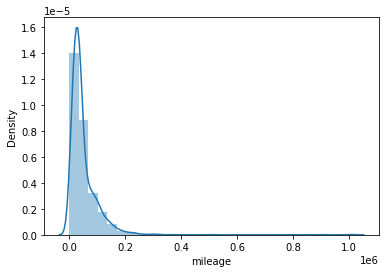

In [74]:
sns.distplot(df_clean['mileage'], bins=30)

In [75]:
df_clean['mileage'].mean()

50111.425081433226

In [76]:
df_clean['mileage'].median()

35048.5

In [77]:
df_clean['mileage'].max()

1017936.0

# 03. Data prep for regression analysis

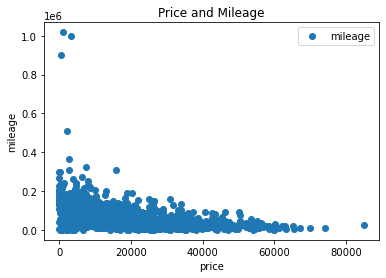

In [78]:
df_clean.plot(x = 'price', y ='mileage',style='o') 
plt.title('Price and Mileage')  
plt.xlabel('price')  
plt.ylabel('mileage')  
plt.show()

# 04. Regression analysis

In [79]:
X = df_clean['price'].values.reshape(-1, 1)
y = df_clean['mileage'].values.reshape(-1, 1)

In [80]:
X

array([[6300],
       [2899],
       [5350],
       ...,
       [9200],
       [9200],
       [9200]])

In [81]:
y

array([[274117.],
       [190552.],
       [ 39590.],
       ...,
       [ 31594.],
       [ 32557.],
       [ 31371.]])

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [83]:
regression = LinearRegression()

In [84]:
regression.fit(X_train, y_train)

LinearRegression()

In [85]:
y_predicted = regression.predict(X_test)

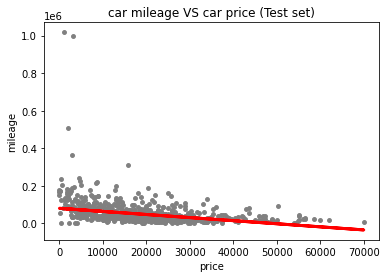

In [86]:
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('car mileage VS car price (Test set)')
plot_test.xlabel('price')
plot_test.ylabel('mileage')
plot_test.show()

In [87]:
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [88]:
print('Slope : ', regression.coef_)
print('Mean squared error : ', rmse)
print('R2 score : ', r2)

Slope :  [[-1.64410711]]
Mean squared error :  4199204115.9231243
R2 score :  0.11227361288709847


Hypothesis(renewd) : If the mileage goes up, the price will be dropped.

As I expected, slop shows negative, so the mileage and price are negatively related. The result of RMSE is 4199204115 and it tells me that regression line is not accurate representation of the data. Also, the R2 score is 0.112 which represents a poor fit.

In [89]:
y_predicted

array([[ 60217.92806496],
       [ 77612.58126952],
       [ 66794.35649769],
       [ 50353.28541587],
       [ 53312.6782106 ],
       [ 77111.12860153],
       [ 33418.9822016 ],
       [ 69309.8403732 ],
       [ 31610.4643826 ],
       [ 46243.01764541],
       [ 63341.7315705 ],
       [ 32268.10722587],
       [ 42461.5712966 ],
       [ 41310.69632087],
       [ 52819.44607814],
       [ 50024.46399423],
       [ 30295.17869605],
       [ 51668.57110241],
       [ 61862.03517314],
       [ 74275.04383991],
       [ 54627.96389714],
       [ 40480.42223124],
       [ 64821.42796787],
       [ 23225.51813087],
       [ 46900.66048869],
       [ 73354.34385933],
       [ 41146.28561005],
       [ 38844.5356586 ],
       [ 35059.80109556],
       [ 42790.39271823],
       [ 58902.64237841],
       [ 29801.9465636 ],
       [ 51997.39252405],
       [ 47065.07119951],
       [ 72384.3206655 ],
       [ 56523.61939288],
       [ 51339.74968078],
       [ 71184.12247653],
       [ 648

In [90]:
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(20)

,Actual,Predicted
0,42902.0,60217.928065
1,104405.0,77612.581270
2,52571.0,66794.356498
3,86125.0,50353.285416
4,41662.0,53312.678211
5,158781.0,77111.128602
6,24116.0,33418.982202
7,69622.0,69309.840373
8,37561.0,31610.464383
9,70727.0,46243.017645


In [91]:
y_predicted_train = regression.predict(X_train)

In [92]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [93]:
print('Slope : ', regression.coef_)
print('Mean squared error : ', rmse)
print('R2 score : ', r2)

Slope :  [[-1.64410711]]
Mean squared error :  1824459072.868724
R2 score :  0.17968975377958585


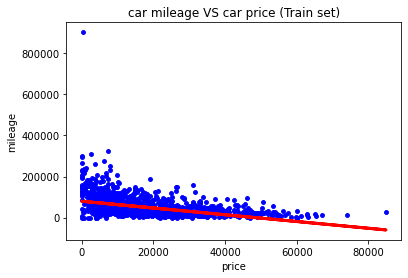

In [94]:
plot_test = plt
plot_test.scatter(X_train, y_train, color='blue', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('car mileage VS car price (Train set)')
plot_test.xlabel('price')
plot_test.ylabel('mileage')
plot_test.show()

The figures of RMSE and R2 are changed, but it does not contain any meaningful insights. In other words, predicting car's price by only its mileage is not a proper approach. Car's brand, model and/or scarcity should be considered for more accurate price analysis.

In [95]:
df_clean = df_clean[df_clean['price'] <=75000]

In [96]:
df_clean = df_clean[df_clean['mileage'] <=900000]

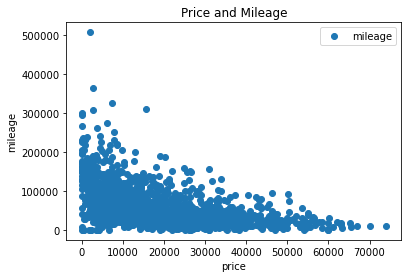

In [97]:
df_clean.plot(x = 'price', y ='mileage',style='o') 
plt.title('Price and Mileage')  
plt.xlabel('price')  
plt.ylabel('mileage')  
plt.show()

In [98]:
X = df_clean['price'].values.reshape(-1, 1)
y = df_clean['mileage'].values.reshape(-1, 1)

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [100]:
regression = LinearRegression()

In [101]:
regression.fit(X_train, y_train)

LinearRegression()

In [102]:
y_predicted = regression.predict(X_test)

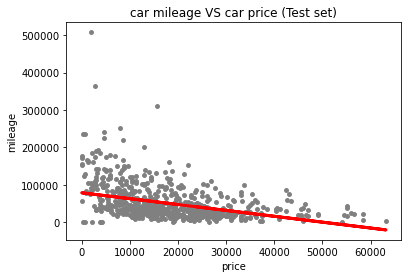

In [103]:
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('car mileage VS car price (Test set)')
plot_test.xlabel('price')
plot_test.ylabel('mileage')
plot_test.show()

In [104]:
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [105]:
print('Slope : ', regression.coef_)
print('Mean squared error : ', rmse)
print('R2 score : ', r2)

Slope :  [[-1.57099864]]
Mean squared error :  1873820506.7740366
R2 score :  0.1775702990270821


In [106]:
y_predicted

array([[ 47217.04821104],
       [ 60570.53664854],
       [ 70263.59825553],
       [ 46745.74861913],
       [ 61198.93610442],
       [ 47688.34780295],
       [ 30721.56249413],
       [ 31821.26154192],
       [ 34664.76907979],
       [ 45646.04957133],
       [ 65283.53256766],
       [ 57271.43950516],
       [ 42504.05229192],
       [ 36220.0577331 ],
       [ 64058.15362869],
       [ 58528.23841692],
       [ 41875.65283604],
       [ 60099.23705663],
       [ 31192.86208604],
       [ 26636.96603089],
       [ 58214.03868898],
       [ 70782.02780663],
       [ 61607.39575075],
       [ 77380.22209339],
       [-10124.40213822],
       [ 52558.44358604],
       [ 42189.85256398],
       [ 48630.94698678],
       [ 44075.05093163],
       [ 66446.07156104],
       [ 42818.25201986],
       [ 62298.63515222],
       [ 47688.34780295],
       [ 70624.92794266],
       [ 58221.89368218],
       [ 36377.15759707],
       [ 34649.05909339],
       [ 42818.25201986],
       [ 348

In [107]:
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(20)

,Actual,Predicted
0,93493.0,47217.048211
1,50193.0,60570.536649
2,37792.0,70263.598256
3,19506.0,46745.748619
4,22305.0,61198.936104
5,61428.0,47688.347803
6,23470.0,30721.562494
7,33909.0,31821.261542
8,4512.0,34664.769080
9,6269.0,45646.049571
